In [1]:
# The heart attack datasets were collected at Zheen hospital in Erbil, Iraq, from January 2019 to May 2019. 
#The attributes of this dataset are: age, gender, heart rate, systolic blood pressure, diastolic blood pressure, blood sugar, ck-mb and troponin with negative or positive output.
    #According to the provided information, the medical dataset classifies either heart attack or none. 
    #The gender column in the data is normalized: the male is set to 1 and the female to 0.
       # The glucose column is set to 1 if it is > 120; otherwise, 0.
       # As for the output, positive is set to 1 and negative to 0. 
        

# Import the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot


# loading the dataset

In [3]:
data=pd.read_csv('Medicaldataset.csv',header=0)
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160.0,83,160.0,1.80,0.012,negative
1,21,1,94,98.0,46,296.0,6.75,1.060,positive
2,55,1,64,160.0,77,270.0,1.99,0.003,negative
3,64,1,70,NaN,55,270.0,NaN,0.122,positive
4,55,1,64,112.0,65,300.0,1.08,0.003,negative


# The gender column in the data is normalized: the male is set to 1 and the female to 0.
  # As for the output, positive is set to 1 and negative to 0. 

In [4]:
data.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1314,44,1,94,122.0,67,204.0,1.63,0.006,negative
1315,66,1,84,125.0,55,149.0,1.33,0.172,positive
1316,45,1,85,168.0,104,96.0,1.24,4.250,positive
1317,54,1,58,117.0,68,443.0,5.80,0.359,positive
1318,51,1,94,157.0,79,134.0,50.89,1.770,positive


In [5]:
data.shape  # no.of rows & column

(1319, 9)

In [6]:
data.info 

<bound method DataFrame.info of       Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                    160.0   
1      21       1          94                     98.0   
2      55       1          64                    160.0   
3      64       1          70                      NaN   
4      55       1          64                    112.0   
...   ...     ...         ...                      ...   
1314   44       1          94                    122.0   
1315   66       1          84                    125.0   
1316   45       1          85                    168.0   
1317   54       1          58                    117.0   
1318   51       1          94                    157.0   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin    Result  
0                           83        160.0   1.80     0.012  negative  
1                           46        296.0   6.75     1.060  positive  
2                           77        270.0   1.99  

In [7]:
data.duplicated().sum()

0

# There is  no duplicates values in this dataset

In [8]:
data.describe(include='all').T     # Descriptive statistical approach in the data..

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1319,NaN,NaN,NaN,56.1918,13.6473,14,47,58,65,103
Gender,1319,NaN,NaN,NaN,0.659591,0.474027,0,0,1,1,1
Heart rate,1319,NaN,NaN,NaN,78.3366,51.6303,20,64,74,85,1111
Systolic blood pressure,1304,NaN,NaN,NaN,127.078,26.1607,42,110,124,143,223
Diastolic blood pressure,1319,NaN,NaN,NaN,72.2691,14.0339,38,62,72,81,154
Blood sugar,1319,NaN,NaN,NaN,146.634,74.923,35,98,116,169.5,541
CK-MB,1297,NaN,NaN,NaN,15.2329,46.4576,0.321,1.66,2.85,5.77,300
Troponin,1319,NaN,NaN,NaN,0.360942,1.15457,0.001,0.006,0.014,0.0855,10.3
Result,1319,2,positive,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing the data

In [9]:
# checking the missing values
data.isnull().sum()

Age                          0
Gender                       0
Heart rate                   0
Systolic blood pressure     15
Diastolic blood pressure     0
Blood sugar                  0
CK-MB                       22
Troponin                     0
Result                       0
dtype: int64

# Missing values are present in 2 column i.e Systolic blood pressure & CK-MB   

In [10]:
# Replacing the missing values with mean()
for x in ['Systolic blood pressure','CK-MB'] :
    data[x].fillna(data[x].mean(),inplace=True)
    

In [11]:
data.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [12]:
for i in data.columns:
    print({i:data[i].unique()}) # there is no unique values  all are countinous numbers in the data

{'Age': array([ 64,  21,  55,  58,  32,  63,  44,  67,  54,  47,  61,  86,  45,
        37,  60,  48,  52,  30,  50,  72,  42,  35,  68,  56,  65,  34,
        40,  46,  38,  57,  28,  49,  29,  80,  90,  62,  53,  75,  66,
        19,  77,  71,  43,  51,  59,  20,  36,  70,  78,  69,  73,  41,
        82,  25,  26,  76,  33,  39,  91,  31,  74,  22,  79,  81,  27,
        83,  24,  85,  88, 100,  23,  14,  87, 103,  84], dtype=int64)}
{'Gender': array([1, 0], dtype=int64)}
{'Heart rate': array([  66,   94,   64,   70,   61,   40,   60,   76,   81,   73,   72,
         92,  135,   63,   65,  125,   62,   58,   93,   96,   95,   97,
         91,   87,   77,   80,   82,   83,   78,   90,   59,   57,   98,
       1111,  102,  103,  105,   74,   85,   75,   71,   68,   67,   56,
         89,   88,   86,   79,  100,   69,   84,  110,  120,  122,  119,
        116,  114,   55,   53,   54,  117,  112,  108,  134,  111,  101,
        113,   51,   52,   99,  132,   50,  107,  104,   49,   46,  

In [13]:
data.dtypes  # chaecking whether dtypes is int if yes convert them float or object into integer

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure     float64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [14]:
colname=[]
for x in data.columns:
    if data[x].dtype=='object'or data[x].dtype=='float64':
        colname.append(x)
colname                        # converting the data into the int in dtype

['Systolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']

In [15]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in data.columns:
    data[x]=le.fit_transform(data[x])              # convert categorical to numerical

In [16]:
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,46,1,22,86,44,96,146,11,0
1,3,1,50,23,7,199,451,251,1
2,37,1,20,86,38,186,163,2,0
3,46,1,26,53,16,186,550,102,1
4,37,1,20,37,26,201,79,2,0


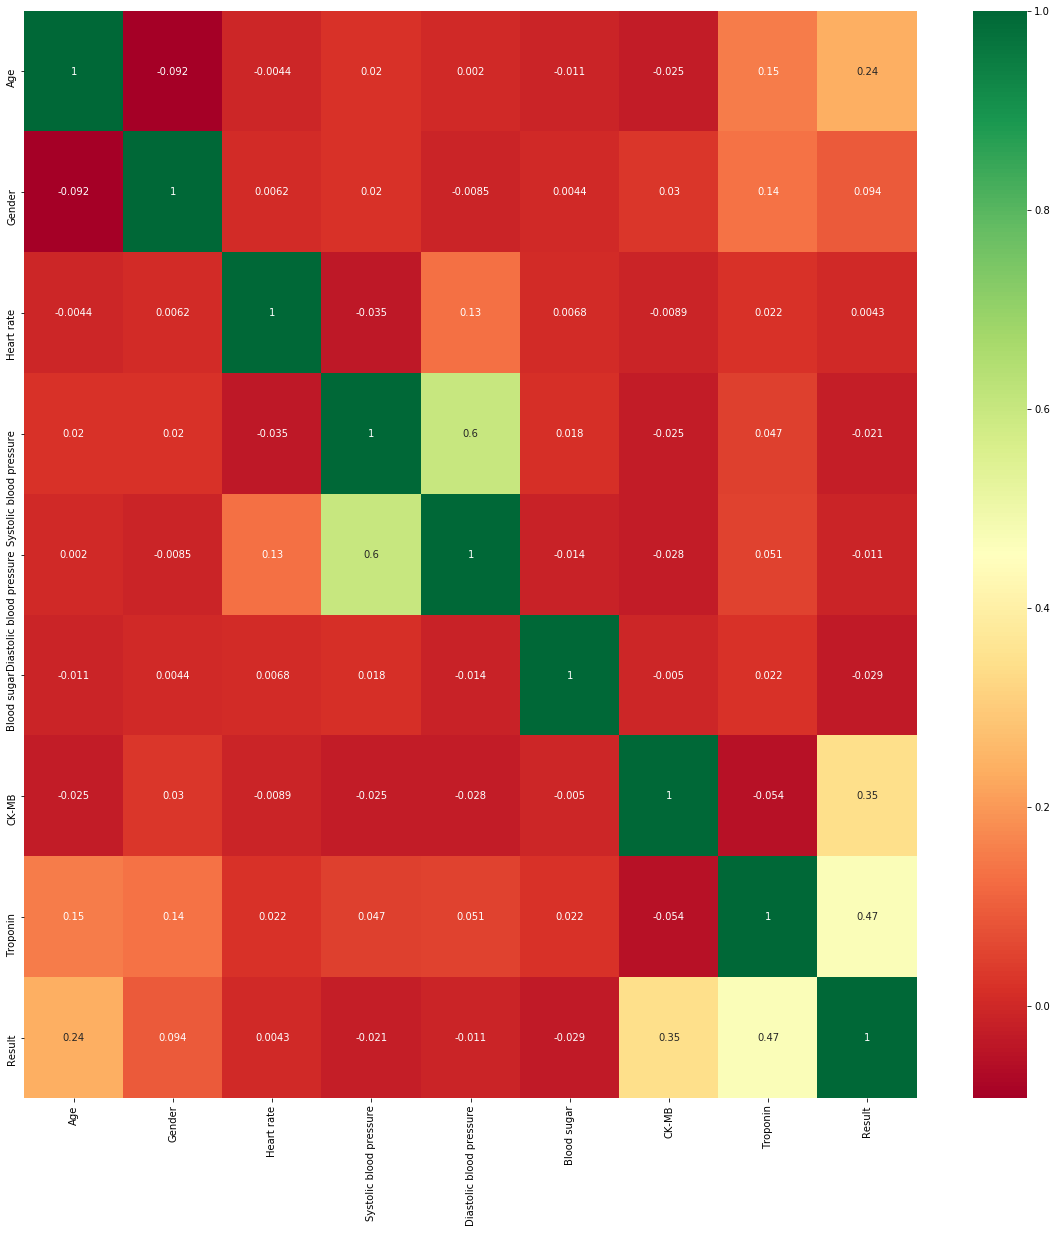

In [17]:
import seaborn as sns
# get correlations of each features in dataset
corrmat=data.corr()
top_corr_features=corrmat.index
plot.figure(figsize=(20,20))
#plot the heatmap
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')


In [18]:
#When we are checking for multi-collinearity between variable we dont want any independent variable 
#being dependent on the other independent variable..>>>>

# EDA part in data

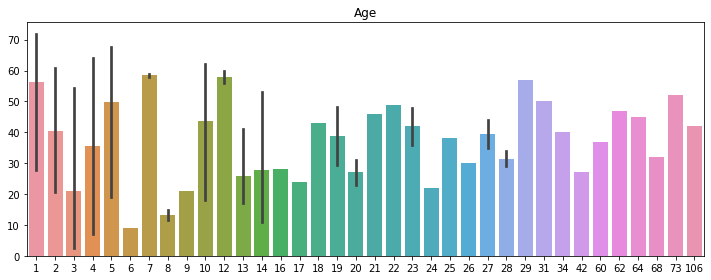

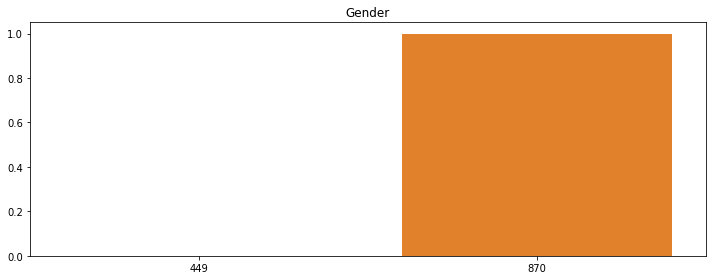

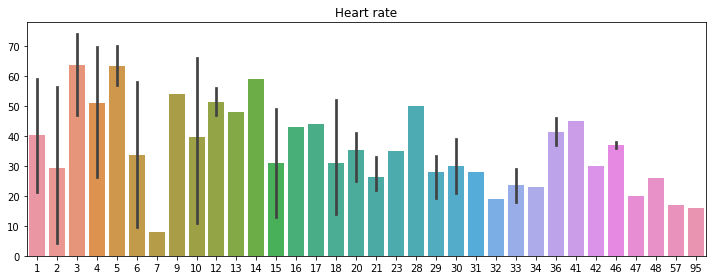

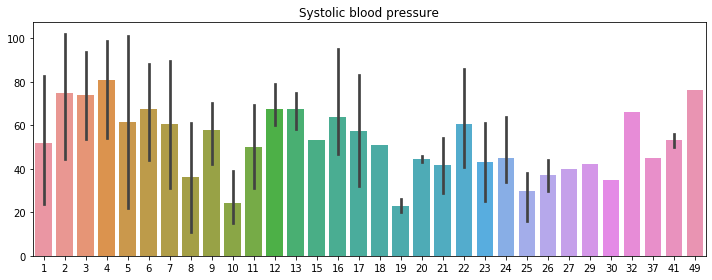

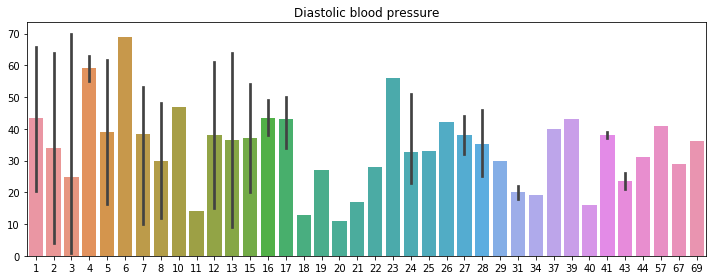

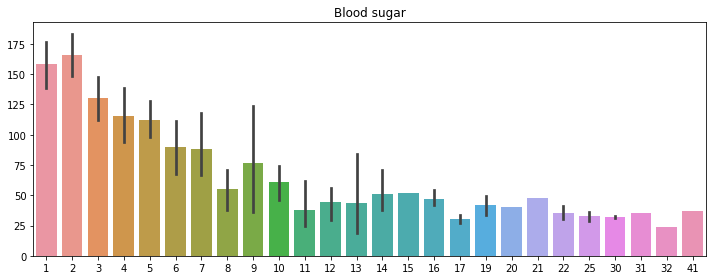

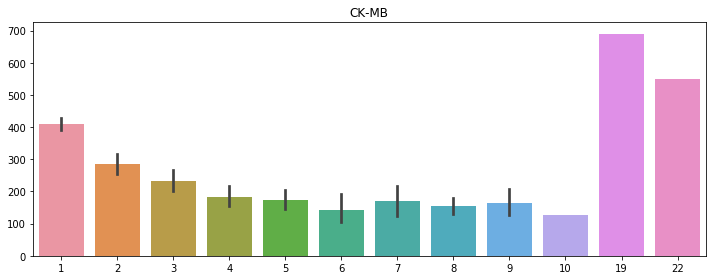

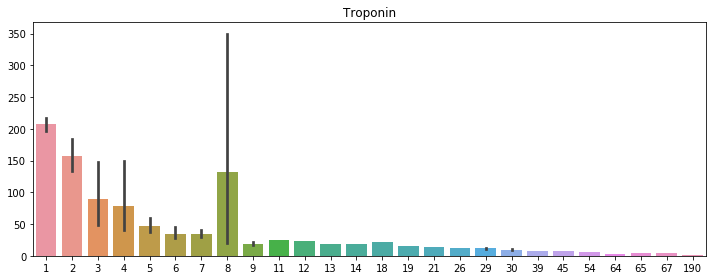

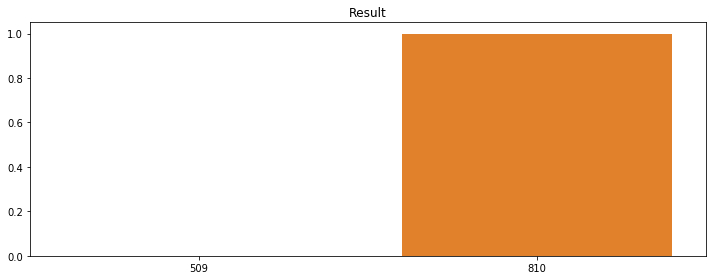

In [19]:
import matplotlib.pyplot as plt
for col in data.columns:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

# in this showing the stable relation variability between them but heart rate & target variable is not showing relationship between them .. its seems the risk of heart attack...

# Check age distribution in the dataset

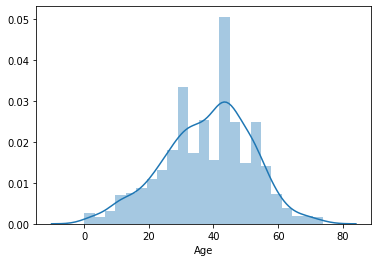

In [20]:
sns.distplot(data['Age'])
plot.show()   # normally distributed data 

# the normally distributed plot...

# Find count of male & female in this dataset

In [21]:
data['Gender'].value_counts()

1    870
0    449
Name: Gender, dtype: int64

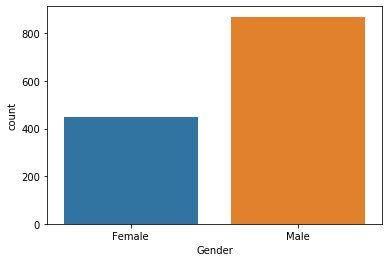

In [22]:
# Assuming 'data' contains the data for the countplot
sns.countplot(data['Gender'])
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


# Around 80% people where male & 30% people where female.....

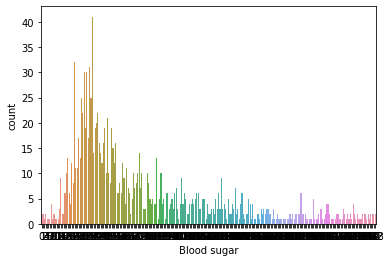

<Figure size 1440x1440 with 0 Axes>

In [23]:
  #The glucose column is set to 1 if it is > 120; otherwise, 0.
sns.countplot(data['Blood sugar'])
plot.figure(figsize=(20,20))
plot.show()

# it is not greater than 120 is set to 0

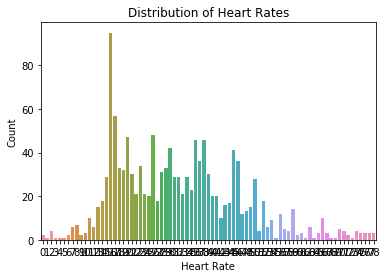

In [24]:
# Assuming 'data' contains the dataset with the 'Heart rate' column
heart_rate_data = data['Heart rate']

# Create a bar plot to visualize the distribution of heart rates
sns.countplot(heart_rate_data)
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.title('Distribution of Heart Rates')
plt.show()


# Find gender distribution according to target variable

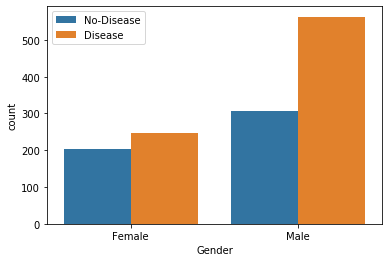

In [25]:
#  As for the output, positive is set to 1 and negative to 0. sns.countplot(data['Result'])
sns.countplot(x='Gender',hue='Result',data=data)
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

# showing the result is positive the heart attack chance is more in person...

In [26]:
data.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

# Basic model running on classification dataset

In [27]:
X = data.values[:,0:-1]
Y = data.values[:, -1]

In [28]:
print(X.shape)
()
print(Y.shape)

(1319, 8)
(1319,)


In [29]:
#the male is set to 1 and the female to 0.
#1>> male
#0>>>female

In [30]:
#  As for the output, positive is set to 1 and negative to 0. 
#1>>>+ve
#0>>-ve

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

X=scaler.transform(X)


In [32]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)

In [33]:
from sklearn.linear_model import LogisticRegression
# Create a Model
classifier = LogisticRegression()
# Fit Training data to the model
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
print(Y_pred)

[1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 1 0 1]


In [34]:
classifier.score(X_train,Y_train)

0.8966824644549763

In [35]:
print(list(zip(Y_test, Y_pred)))

[(0, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (0, 0), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1),

In [36]:
classifier.predict((X_test))

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 79  11]
 [ 16 158]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        90
           1       0.93      0.91      0.92       174

    accuracy                           0.90       264
   macro avg       0.88      0.89      0.89       264
weighted avg       0.90      0.90      0.90       264

Accuracy of the model:  0.8977272727272727


# The accuracy of the model is 0.8977, indicating that it correctly predicted 89.77% of the instances.

Overall, the model seems to perform well, with high precision, recall, and F1-score for both classes. The accuracy also indicates that the model is fairly accurate in its predictions.






In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
logreg=LogisticRegression(random_state=10)
nb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric="euclidean")
svm=SVC(kernel="rbf",gamma=0.1,C=1)
RF = RandomForestClassifier()  # Initialize the Random Forest classifier
grad = GradientBoostingClassifier() # Assuming 'grad' is defined elsewhere
Adboost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),n_estimators=100,random_state=10)

In [39]:
models = [logreg, nb, Adboost, knn, svm, RF, grad]
for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred) 
    clf_report = classification_report(Y_test, Y_pred) 
    print(confusion_matrix(Y_test, Y_pred))
    print("The accuracy of the", type(model).__name__, "model is", accuracy*100)
    print("Classification report:\n", clf_report)
    print("\n")


[[ 79  11]
 [ 16 158]]
The accuracy of the LogisticRegression model is 89.77272727272727
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        90
           1       0.93      0.91      0.92       174

    accuracy                           0.90       264
   macro avg       0.88      0.89      0.89       264
weighted avg       0.90      0.90      0.90       264



[[ 87   3]
 [ 33 141]]
The accuracy of the GaussianNB model is 86.36363636363636
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.83        90
           1       0.98      0.81      0.89       174

    accuracy                           0.86       264
   macro avg       0.85      0.89      0.86       264
weighted avg       0.89      0.86      0.87       264



[[ 87   3]
 [  3 171]]
The accuracy of the AdaBoostClassifier model is 97.72727272727273
Classification report:
            

# Among these models, the Randomforest has the highest F1-scores for both classes (0.98 for class 0 and 0.99for class 1). Therefore, based on the F1-scores, theRandomforestClassifier  is the most efficient in classifying both classes.
